In [2]:
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import copy
import torch
import torch.nn as nn
import torch.nn.functional as nnF
import torch.optim as optim
from torch.utils.data import DataLoader as torch_dataloader
import torchvision
from torchvision import datasets, transforms
import torchvision.models as tv_models

In [3]:
import torch
from torch.utils.data import DataLoader as torch_dataloader
from torch.utils.data import Dataset as torch_dataset
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io as io
import glob
import pandas as pd


def get_dataloader(path=r'/Users/niceyraiyani/Desktop/CSC 546/hw5s/S224'):
    df_train=pd.read_csv(path+'/train.csv')
    df_val=pd.read_csv(path+'/val.csv')
    df_test=pd.read_csv(path+'/test.csv')
    print("Train file paths:", df_train['filename'].values)
    print("Val file paths:", df_val['filename'].values)
    print("Test file paths:", df_test['filename'].values)
    dataset_train = MyDataset(path+'/', df_train['filename'].values, df_train['label'].values)
    dataset_val = MyDataset(path+'/', df_val['filename'].values, df_val['label'].values)
    dataset_test = MyDataset(path+'/', df_test['filename'].values, df_test['label'].values)
    loader_train = torch_dataloader(dataset_train, batch_size=32, num_workers=0,
                                    shuffle=True, pin_memory=True)
    loader_val = torch_dataloader(dataset_val, batch_size=32, num_workers=0,
                                  shuffle=False, pin_memory=True)
    loader_test = torch_dataloader(dataset_test, batch_size=32, num_workers=0,
                                   shuffle=True, pin_memory=True)
    return loader_train, loader_val, loader_test


def get_datasets(path=r'/Users/niceyraiyani/Desktop/CSC 546/hw5s/S224'):
    df_train=pd.read_csv(path+'/train.csv')
    df_val=pd.read_csv(path+'/val.csv')
    df_test=pd.read_csv(path+'/test.csv')
    dataset_train = MyDataset(path+'/', df_train['filename'].values, df_train['label'].values)
    dataset_val = MyDataset(path+'/', df_val['filename'].values, df_val['label'].values)
    dataset_test = MyDataset(path+'/', df_test['filename'].values, df_test['label'].values)
    return dataset_train, dataset_val, dataset_test

class MyDataset(torch_dataset):
    def __init__(self, path, filenamelist, labellist):
        self.path=path
        self.filenamelist=filenamelist
        self.labellist=labellist
    def __len__(self):
        return len(self.filenamelist)
    def __getitem__(self, idx):
        I=io.imread(self.path+self.filenamelist[idx])
        I=skimage.util.img_as_float32(I)
        I = I.reshape(1,I.shape[0],I.shape[1])
        I = torch.tensor(I, dtype=torch.float32)
        I = I.expand(3, I.shape[1],I.shape[2])
        label=torch.tensor(self.labellist[idx], dtype=torch.int64)
        return I, label

In [4]:
from torchvision import transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
dataset_train, dataset_val, dataset_test = get_datasets()
loader_train, loader_val, loader_test = get_dataloader()

Train file paths: ['NORMAL/Non-Covid (1014).png' 'NORMAL/Non-Covid (2).png'
 'NORMAL/Non-Covid (311).png' ... 'COVID/Covid (959).png'
 'COVID/Covid (196).png' 'COVID/Covid (6).png']
Val file paths: ['NORMAL/Non-Covid (1198).png' 'NORMAL/Non-Covid (954).png'
 'NORMAL/Non-Covid (113).png' 'NORMAL/Non-Covid (151).png'
 'NORMAL/Non-Covid (57).png' 'NORMAL/Non-Covid (1024).png'
 'NORMAL/Non-Covid (61).png' 'NORMAL/Non-Covid (1100).png'
 'NORMAL/Non-Covid (614).png' 'NORMAL/Non-Covid (349).png'
 'NORMAL/Non-Covid (676).png' 'NORMAL/Non-Covid (878).png'
 'NORMAL/Non-Covid (984).png' 'NORMAL/Non-Covid (1157).png'
 'NORMAL/Non-Covid (615).png' 'NORMAL/Non-Covid (688).png'
 'NORMAL/Non-Covid (115).png' 'NORMAL/Non-Covid (203).png'
 'NORMAL/Non-Covid (23).png' 'NORMAL/Non-Covid (845).png'
 'NORMAL/Non-Covid (918).png' 'NORMAL/Non-Covid (903).png'
 'NORMAL/Non-Covid (1114).png' 'NORMAL/Non-Covid (1169).png'
 'NORMAL/Non-Covid (1120).png' 'NORMAL/Non-Covid (697).png'
 'NORMAL/Non-Covid (1176).png' 

In [5]:
print(f'dataset_train: {len(dataset_train)}, loader_train: {len(loader_train)}')
print(f'dataset_val: {len(dataset_val)}, loader_val: {len(loader_val)}')

dataset_train: 2022, loader_train: 64
dataset_val: 60, loader_val: 2


In [6]:
(x, label) = dataset_train[0]
print(x.shape)
print(label)

torch.Size([3, 224, 224])
tensor(0)


/var/folders/n2/tjkny83s6vv2353dkdjnr36w0000gn/T/ipykernel_11216/485592088.py:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label=torch.tensor(self.labellist[idx], dtype=torch.int64)


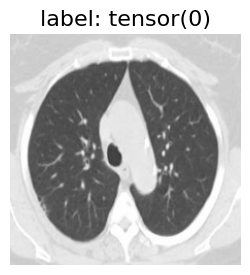

In [7]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, 10, 1):
    x = dataset_train[n][0].detach().cpu().numpy()
    y = dataset_train[n][1]
    x = x.transpose(1,2,0)
    ax.imshow(x)
    ax.set_title('label: ' + str(y), fontsize=16)
    ax.axis('off')
    display.clear_output(wait=False)
    display.display(fig)
    plt.pause(0.5)  

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()        
        #resnet50 base model
        self.resnet50 = tv_models.resnet50()  
        self.resnet50.fc=torch.nn.Linear(2048, 1)          
    
    def forward(self,x):
        z = self.resnet50(x)
        z = z.view(-1)
        return z

In [ ]:
def save_checkpoint(filename, model, optimizer, result, epoch):
    torch.save({'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'result':result},
               filename)
    print('saved:', filename)


In [ ]:
tv_models.resnet50()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
def train(model, device, optimizer, dataloader, epoch):    
    model.train()
    #train model
    loss_train=0
    acc_train =0 
    for batch_idx, (X, Y) in enumerate(dataloader):
        Y = Y.to(X.dtype)
        X, Y = X.to(device), Y.to(device)
        Z = model(X)
        loss = nnF.binary_cross_entropy_with_logits(Z, Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_train+=loss.item()        
        Yp = (Z.data > 0).to(torch.int64)
        Y = Y.to(torch.int64)
        acc_train+= torch.sum(Yp==Y).item()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{:.0f}%]\tLoss: {:.6f}'.format(
                    epoch, 100. * batch_idx / len(dataloader), loss.item()))
    loss_train/=len(dataloader)
    acc_train/=len(dataloader.dataset) 
    return loss_train, acc_train

In [ ]:
def test(model, device, dataloader):
    model.eval()
    #evaluate model
    loss_test=0
    acc_test =0
    Confusion=np.zeros((2,2))
    with torch.no_grad():
        for batch_idx, (X, Y) in enumerate(dataloader):     
            Y = Y.to(X.dtype)
            X, Y = X.to(device), Y.to(device)
            Z = model(X)           
            loss = nnF.binary_cross_entropy_with_logits(Z, Y)
            loss_test+=loss.item()
            Yp = (Z.data > 0).to(torch.int64)
            Y = Y.to(torch.int64)
            acc_test+= torch.sum(Yp==Y).item()
            for i in range(0, 2):
                for j in range(0, 2):
                    Confusion[i,j]+=torch.sum((Y==i)&(Yp==j)).item()
    loss_test/=len(dataloader)        
    acc_test/=len(dataloader.dataset)
    Sens=np.zeros(2)
    Prec=np.zeros(2)   
    for n in range(0, 2):
        TP=Confusion[n,n]
        FN=np.sum(Confusion[n,:])-TP
        FP=np.sum(Confusion[:,n])-TP
        Sens[n]=TP/(TP+FN)
        Prec[n]=TP/(TP+FP)    
    Acc = Confusion.diagonal().sum()/Confusion.sum() # should be the same as acc_test
    return loss_test, acc_test, (Confusion, Acc, Sens, Prec)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device', device)
model1=Net()
model1.to(device)
optimizer = optim.SGD(model1.parameters(), lr=0.0001, momentum=0.99) 
(x,label)=dataset_train[0]
x=x.view(1,3,224,224).to(device)
label=label.to(device)
z=model1(x)
loss_train_list=[]
acc_train_list=[]
loss_val_list=[]
acc_val_list=[]
epoch_save=-1

device cpu


/var/folders/n2/tjkny83s6vv2353dkdjnr36w0000gn/T/ipykernel_5738/485592088.py:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label=torch.tensor(self.labellist[idx], dtype=torch.int64)


In [ ]:
z

tensor([0.7272], grad_fn=<ViewBackward0>)

In [ ]:
y_hat = torch.sigmoid(z)
y_hat

tensor([0.6742], grad_fn=<SigmoidBackward0>)

In [ ]:
z.shape

torch.Size([1])

In [ ]:
# plots result
def plot_result(loss_train_list, acc_train_list, 
                loss_val_list, acc_val_list):    
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    ax[0].set_title('loss v.s. epoch',fontsize=16)
    ax[0].plot(loss_train_list, '-b', label='training loss')
    ax[0].plot(loss_val_list, '-g', label='validation loss')
    ax[0].set_xlabel('epoch',fontsize=16)
    ax[0].legend(fontsize=16)
    ax[0].grid(True)
    ax[1].set_title('accuracy v.s. epoch',fontsize=16)
    ax[1].plot(acc_train_list, '-b', label='training accuracy')
    ax[1].plot(acc_val_list, '-g', label='validation accuracy')
    ax[1].set_xlabel('epoch',fontsize=16)
    ax[1].legend(fontsize=16)
    ax[1].grid(True)
    return fig, ax

In [ ]:
lr_new=0.0001
for g in optimizer.param_groups:
    g['lr']=lr_new

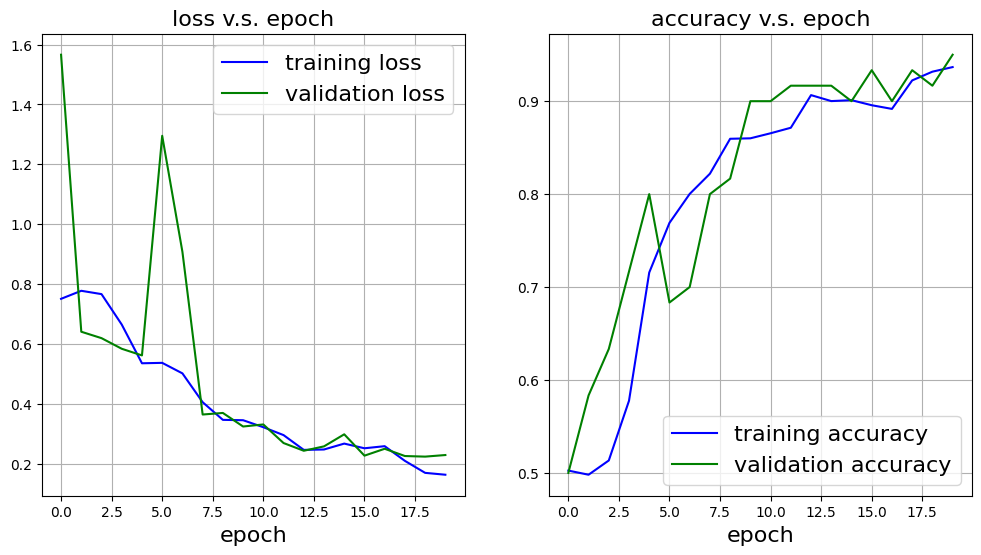

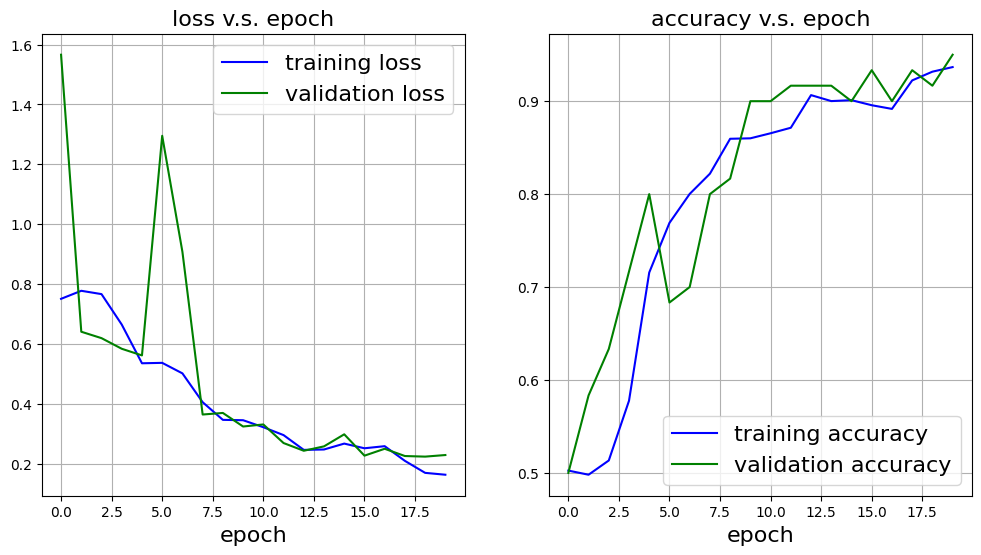

In [ ]:
for epoch in range(epoch_save+1, 20):
    t0=time.time()
    loss_train, acc_train =train(model1, device, optimizer, loader_train, epoch)    
    loss_train_list.append(loss_train)
    acc_train_list.append(acc_train)
    print('epoch', epoch, 'training loss:', loss_train, 'acc:', acc_train)
    loss_val, acc_val, other_val = test(model1, device, loader_val)
    loss_val_list.append(loss_val)
    acc_val_list.append(acc_val)
    print('epoch', epoch, 'validation loss:', loss_val, 'acc:', acc_val)   
    t1=time.time()
    print("time cost", t1-t0)
    result = (loss_train_list, acc_train_list, 
              loss_val_list, acc_val_list, other_val)
    save_checkpoint('CNN_LS_Pytorch_epoch'+str(epoch)+'.pt', model1, optimizer, result, epoch)
    epoch_save=epoch
    display.clear_output(wait=False)
    plt.close('all')
    fig, ax = plot_result(loss_train_list, acc_train_list, 
                          loss_val_list, acc_val_list)
    display.display(fig)

In [ ]:
best_id= np.array(acc_val_list).argmax()

In [ ]:
epoch_save=best_id
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
checkpoint=torch.load('CNN_LS_Pytorch_epoch'+str(epoch_save)+'.pt', map_location=device)
model1=Net()
model1.load_state_dict(checkpoint['model_state_dict'])
model1.to(device)
model1.eval() 
(loss_train_list, acc_train_list, 
 loss_val_list, acc_val_list, other_val) = checkpoint['result']  

In [ ]:
loss_test, acc_test_1, (Confusion, Acc, Sens, Prec) = test(model1, device, loader_test)
Confusion_sens=Confusion.copy()
for n in range(0, 2):
    Confusion_sens[n,:]/=np.sum(Confusion[n,:])
Confusion_prec=Confusion.copy()
for n in range(0, 2):
    Confusion_prec[:,n]/=np.sum(Confusion[:,n])
print('Accuracy (average)', acc_test_1)
print('Accuracy (average)', Acc)
print('Sensitivity', Sens)
print('Precision', Prec)
print('Confusion_sens \n', Confusion_sens)
print('Confusion_prec \n', Confusion_prec)

/var/folders/n2/tjkny83s6vv2353dkdjnr36w0000gn/T/ipykernel_5738/485592088.py:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label=torch.tensor(self.labellist[idx], dtype=torch.int64)


Accuracy (average) 0.9125
Accuracy (average) 0.9125
Sensitivity [0.955 0.87 ]
Precision [0.88018433 0.95081967]
Confusion_sens 
 [[0.955 0.045]
 [0.13  0.87 ]]
Confusion_prec 
 [[0.88018433 0.04918033]
 [0.11981567 0.95081967]]


In [ ]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50, ResNet50_Weights
import numpy as np
import torch
import matplotlib.pyplot as plt
import skimage

In [ ]:
model1.load_state_dict(checkpoint['model_state_dict'])
model1.eval()

Net(
  (resnet50): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0)

(224, 224, 3)


/var/folders/n2/tjkny83s6vv2353dkdjnr36w0000gn/T/ipykernel_5738/485592088.py:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label=torch.tensor(self.labellist[idx], dtype=torch.int64)


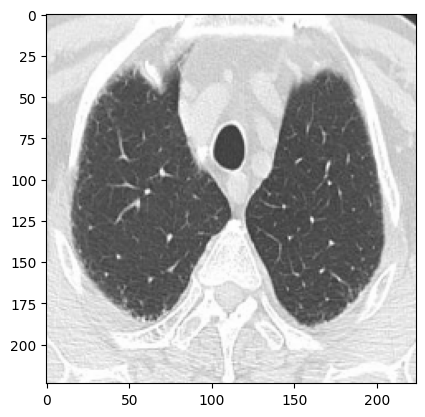

In [ ]:
image_tensor, label = random.choice(dataset_test)
image = image_tensor.numpy().transpose(1, 2, 0)  

image=image.astype("float32")
image=image/image.max()
image.shape
print(image.shape)
plt.imshow(image)

In [ ]:
if len(image.shape)==2:
    image=image.reshape(224,224,1)
    image=np.concatenate([image, image, image], axis=2)
    plt.imshow(image, cmap='gray')

In [ ]:
#convert numpy array to pytorch tensor
image_input=torch.tensor(image).permute(2,0,1) 
image_input=image_input.reshape(1,3,224,224)
image_input.shape

torch.Size([1, 3, 224, 224])

In [ ]:
def ClassifierOutputTarget(output):
    return output

In [ ]:
model_output=model1(image_input)
print(model_output.shape)
print(model_output)

torch.Size([1])
tensor([-3.9879], grad_fn=<ViewBackward0>)


In [ ]:
target_layers = [model1.resnet50.layer4[-1]]
cam = GradCAM(model=model1, target_layers=target_layers)


In [ ]:
grayscale_cam = cam(input_tensor=image_input, targets = [ClassifierOutputTarget])
grayscale_cam.shape

(1, 224, 224)

In [ ]:
grayscale_cam=grayscale_cam[0]
grayscale_cam.shape

(224, 224)

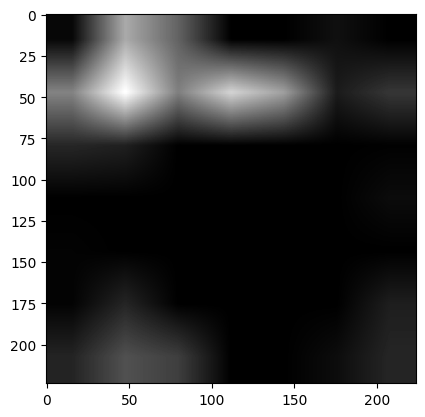

In [ ]:
plt.imshow(grayscale_cam, cmap='gray')

In [ ]:
# In this example grayscale_cam has only one image in the batch:
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)

In [ ]:
cam_image.shape

(224, 224, 3)

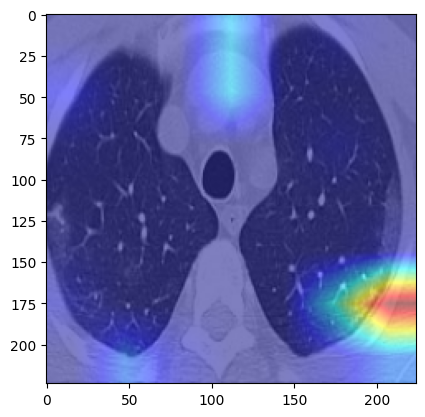

In [ ]:
plt.imshow(cam_image)

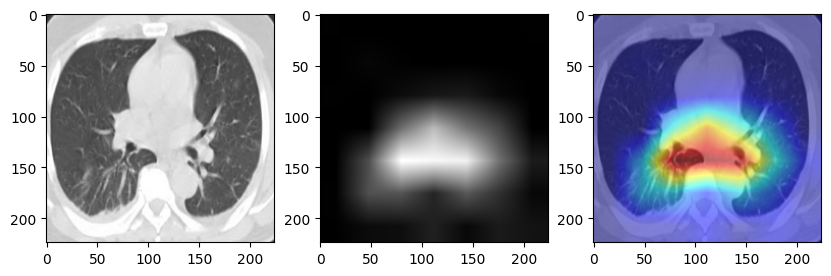

In [ ]:
#GradCAM image 1
cam = GradCAM(model=model1, target_layers=target_layers)
grayscale_cam = cam(input_tensor=image_input, targets=[ClassifierOutputTarget])
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)


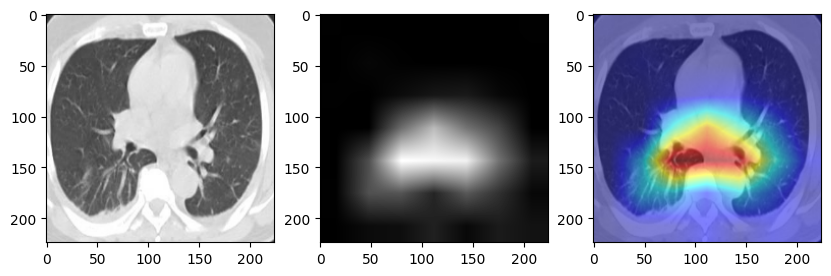

In [ ]:
#HiResCAM Image 1
cam = HiResCAM(model=model1, target_layers=target_layers)
grayscale_cam = cam(input_tensor=image_input, targets=[ClassifierOutputTarget])
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

/var/folders/n2/tjkny83s6vv2353dkdjnr36w0000gn/T/ipykernel_5738/485592088.py:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label=torch.tensor(self.labellist[idx], dtype=torch.int64)


(224, 224, 3)


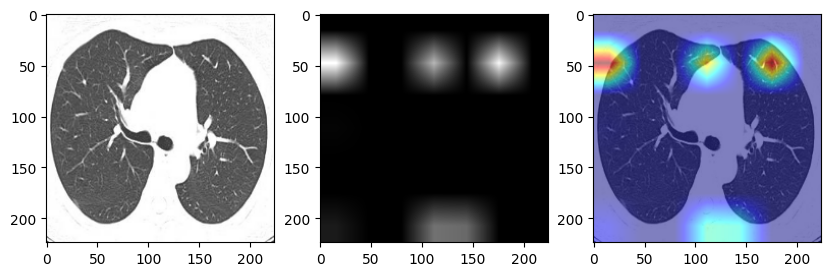

In [ ]:
# GradCam IMAGE 2 
image_tensor, label = random.choice(dataset_test)

# Convert the tensor to numpy array and adjust the channel order
image = image_tensor.numpy().transpose(1, 2, 0)

image=image.astype("float32")
image=image/image.max()
image.shape
print(image.shape)

if len(image.shape)==2:
    image=image.reshape(224,224,1)
    image=np.concatenate([image, image, image], axis=2)
    plt.imshow(image, cmap='gray')
    
#convert numpy array to pytorch tensor
image_input=torch.tensor(image).permute(2,0,1) 
image_input=image_input.reshape(1,3,224,224)
image_input.shape

cam = GradCAM(model=model1, target_layers=target_layers)
grayscale_cam = cam(input_tensor=image_input, targets=[ClassifierOutputTarget])
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

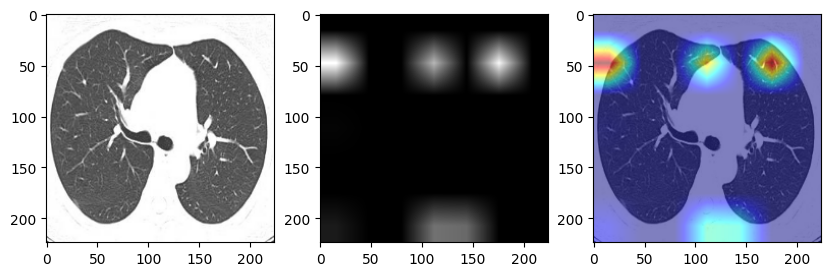

In [ ]:
#HiResCAM Image 2
cam = HiResCAM(model=model1, target_layers=target_layers)
grayscale_cam = cam(input_tensor=image_input, targets=[ClassifierOutputTarget])
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

/var/folders/n2/tjkny83s6vv2353dkdjnr36w0000gn/T/ipykernel_5738/485592088.py:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label=torch.tensor(self.labellist[idx], dtype=torch.int64)


(224, 224, 3)


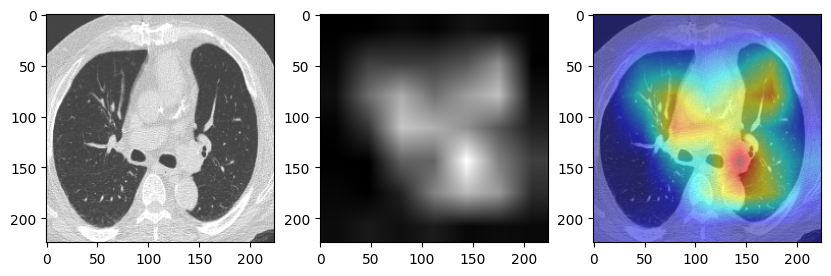

In [ ]:
# IMAGE 3
image_tensor, label = random.choice(dataset_test)


image = image_tensor.numpy().transpose(1, 2, 0) 

image=image.astype("float32")
image=image/image.max()
image.shape
print(image.shape)

if len(image.shape)==2:
    image=image.reshape(224,224,1)
    image=np.concatenate([image, image, image], axis=2)
    plt.imshow(image, cmap='gray')
    
#convert numpy array to pytorch tensor
image_input=torch.tensor(image).permute(2,0,1) 
image_input=image_input.reshape(1,3,224,224)
image_input.shape

cam = GradCAM(model=model1, target_layers=target_layers)
grayscale_cam = cam(input_tensor=image_input, targets=[ClassifierOutputTarget])
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

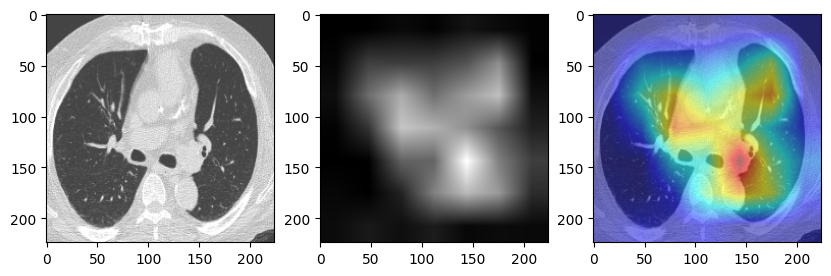

In [ ]:
#HiResCAM Image 3
cam = HiResCAM(model=model1, target_layers=target_layers)
grayscale_cam = cam(input_tensor=image_input, targets=[ClassifierOutputTarget])
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

# MODEL 2

In [ ]:
# Create CNN using transfers
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
dataset_train, dataset_val, dataset_test = get_datasets()
loader_train, loader_val, loader_test = get_dataloader()

Train file paths: ['NORMAL/Non-Covid (1014).png' 'NORMAL/Non-Covid (2).png'
 'NORMAL/Non-Covid (311).png' ... 'COVID/Covid (959).png'
 'COVID/Covid (196).png' 'COVID/Covid (6).png']
Val file paths: ['NORMAL/Non-Covid (1198).png' 'NORMAL/Non-Covid (954).png'
 'NORMAL/Non-Covid (113).png' 'NORMAL/Non-Covid (151).png'
 'NORMAL/Non-Covid (57).png' 'NORMAL/Non-Covid (1024).png'
 'NORMAL/Non-Covid (61).png' 'NORMAL/Non-Covid (1100).png'
 'NORMAL/Non-Covid (614).png' 'NORMAL/Non-Covid (349).png'
 'NORMAL/Non-Covid (676).png' 'NORMAL/Non-Covid (878).png'
 'NORMAL/Non-Covid (984).png' 'NORMAL/Non-Covid (1157).png'
 'NORMAL/Non-Covid (615).png' 'NORMAL/Non-Covid (688).png'
 'NORMAL/Non-Covid (115).png' 'NORMAL/Non-Covid (203).png'
 'NORMAL/Non-Covid (23).png' 'NORMAL/Non-Covid (845).png'
 'NORMAL/Non-Covid (918).png' 'NORMAL/Non-Covid (903).png'
 'NORMAL/Non-Covid (1114).png' 'NORMAL/Non-Covid (1169).png'
 'NORMAL/Non-Covid (1120).png' 'NORMAL/Non-Covid (697).png'
 'NORMAL/Non-Covid (1176).png' 

In [ ]:
print(f'dataset_train: {len(dataset_train)}, loader_train: {len(loader_train)}')
print(f'dataset_val: {len(dataset_val)}, loader_val: {len(loader_val)}')

dataset_train: 2022, loader_train: 64
dataset_val: 60, loader_val: 2


In [ ]:
(x, label)=dataset_train[0]
print(x.shape)
print(label)

torch.Size([3, 224, 224])
tensor(0)


/var/folders/n2/tjkny83s6vv2353dkdjnr36w0000gn/T/ipykernel_5738/485592088.py:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label=torch.tensor(self.labellist[idx], dtype=torch.int64)


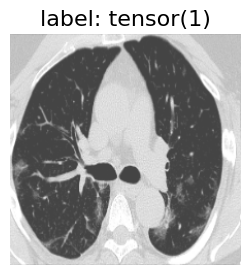

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, 1100, 100):
    x = dataset_train[n][0].detach().cpu().numpy()
    y = dataset_train[n][1]
    x = x.transpose(1, 2, 0)
    ax.imshow(x)
    ax.set_title('label: ' + str(y), fontsize=16)
    ax.axis('off')
    display.clear_output(wait=False)
    display.display(fig)
    plt.pause(0.5)

In [ ]:
from torchvision.models import ResNet50_Weights
class Net(nn.Module):
    def __init__(self):
        super().__init__()        
        #use resnet50 as the base model
        #self.resnet50 = tv_models.resnet50(pretrained=True) #old Pytorch
        self.resnet50 = tv_models.resnet50(weights=ResNet50_Weights.DEFAULT)
        #modified the last layer for binary classification  
        self.resnet50.fc=torch.nn.Linear(2048, 1)           
        #freeze all parameters
        for p in self.resnet50.parameters():
            p.requires_grad = False 
        #set the parameters of layer4 to be trainable       
        for p in self.resnet50.layer4.parameters():
            p.requires_grad = True       
        #set the parameters of fc to be trainable       
        for p in self.resnet50.fc.parameters():
            p.requires_grad = True       
        
    def get_trainable_parameters(self):
        pList=list(self.resnet50.layer4.parameters())+list(self.resnet50.fc.parameters())
        return pList
    
    def forward(self,x):
        z = self.resnet50(x)
        z = z.view(-1)
        return z

In [ ]:
def save_checkpoint(filename, model, optimizer, result, epoch):
    torch.save({'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'result':result},
               filename)
    print('saved:', filename)

In [ ]:
tv_models.resnet50(weights=ResNet50_Weights.DEFAULT)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50, ResNet50_Weights
import numpy as np
import torch
import matplotlib.pyplot as plt
import skimage

In [ ]:
model1.load_state_dict(checkpoint['model_state_dict'])
model1.eval()

Net(
  (resnet50): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0)

In [ ]:
def test(model, device, dataloader):
    model.eval()#set model to evaluation mode
    loss_test=0
    acc_test =0
    Confusion=np.zeros((2,2))
    with torch.no_grad(): # tell Pytorch not to build graph in the with section
        for batch_idx, (X, Y) in enumerate(dataloader):     
            Y = Y.to(X.dtype)
            X, Y = X.to(device), Y.to(device)
            Z = model(X)#forward pass            
            loss = nnF.binary_cross_entropy_with_logits(Z, Y)
            loss_test+=loss.item()
            Yp = (Z.data > 0).to(torch.int64)
            Y = Y.to(torch.int64)
            acc_test+= torch.sum(Yp==Y).item()
            for i in range(0, 2):
                for j in range(0, 2):
                    Confusion[i,j]+=torch.sum((Y==i)&(Yp==j)).item()
    loss_test/=len(dataloader)        
    acc_test/=len(dataloader.dataset)
    Sens=np.zeros(2)
    Prec=np.zeros(2)   
    for n in range(0, 2):
        TP=Confusion[n,n]
        FN=np.sum(Confusion[n,:])-TP
        FP=np.sum(Confusion[:,n])-TP
        Sens[n]=TP/(TP+FN)
        Prec[n]=TP/(TP+FP)    
    Acc = Confusion.diagonal().sum()/Confusion.sum() # should be the same as acc_test
    return loss_test, acc_test, (Confusion, Acc, Sens, Prec)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device', device)
model2=Net()
model2.to(device)
optimizer = optim.SGD(model2.get_trainable_parameters(), lr=0.0001, momentum=0.99) 
(x,label)=dataset_train[0]
x=x.view(1,3,224,224).to(device)
z=model2(x)
loss_train_list=[]
acc_train_list=[]
loss_val_list=[]
acc_val_list=[]
epoch_save=-1

device cpu


/var/folders/n2/tjkny83s6vv2353dkdjnr36w0000gn/T/ipykernel_5738/485592088.py:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label=torch.tensor(self.labellist[idx], dtype=torch.int64)


In [ ]:
z

tensor([0.0248], grad_fn=<ViewBackward0>)

In [ ]:
y_hat = torch.sigmoid(z)
y_hat

tensor([0.5062], grad_fn=<SigmoidBackward0>)

In [ ]:
z.shape

torch.Size([1])

In [ ]:
def plot_result(loss_train_list, acc_train_list, 
                loss_val_list, acc_val_list):    
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    ax[0].set_title('loss v.s. epoch',fontsize=16)
    ax[0].plot(loss_train_list, '-b', label='training loss')
    ax[0].plot(loss_val_list, '-g', label='validation loss')
    ax[0].set_xlabel('epoch',fontsize=16)
    ax[0].legend(fontsize=16)
    ax[0].grid(True)
    ax[1].set_title('accuracy v.s. epoch',fontsize=16)
    ax[1].plot(acc_train_list, '-b', label='training accuracy')
    ax[1].plot(acc_val_list, '-g', label='validation accuracy')
    ax[1].set_xlabel('epoch',fontsize=16)
    #ax[1].set_xticks(np.arange(len(loss_train_list)))
    ax[1].legend(fontsize=16)
    ax[1].grid(True)
    return fig, ax

In [ ]:
lr_new=0.0001
for g in optimizer.param_groups:
    g['lr']=lr_new

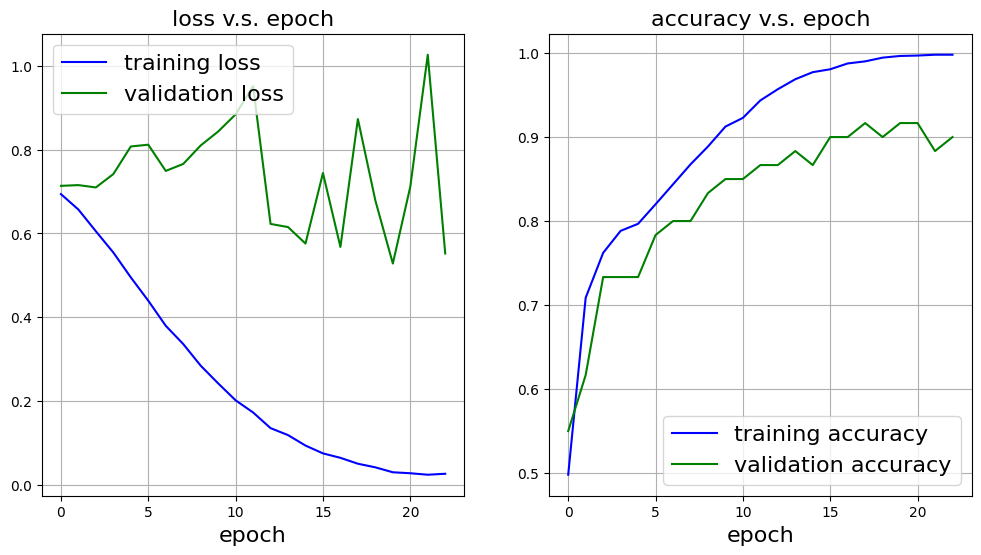

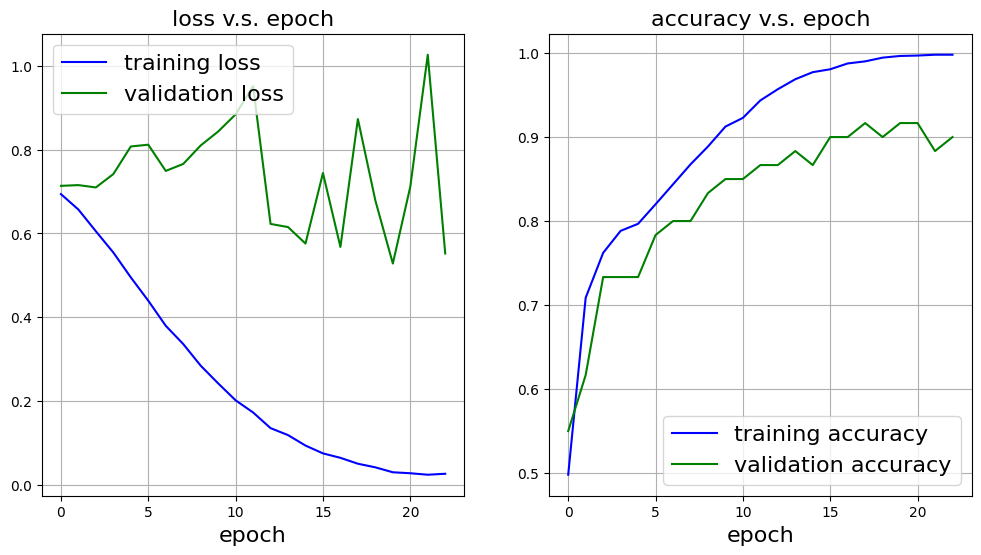

In [ ]:
for epoch in range(epoch_save+1, 23):
    t0=time.time()
    loss_train, acc_train =train(model2, device, optimizer, loader_train, epoch)    
    loss_train_list.append(loss_train)
    acc_train_list.append(acc_train)
    print('epoch', epoch, 'training loss:', loss_train, 'acc:', acc_train)
    #-------- validation --------------------------------
    loss_val, acc_val, other_val = test(model2, device, loader_val)
    loss_val_list.append(loss_val)
    acc_val_list.append(acc_val)
    print('epoch', epoch, 'validation loss:', loss_val, 'acc:', acc_val)   
    t1=time.time()
    print("time cost", t1-t0)
    #--------save model-------------------------
    result = (loss_train_list, acc_train_list, 
              loss_val_list, acc_val_list, other_val)
    save_checkpoint('CNN_TL_Pytorch_epoch'+str(epoch)+'.pt', model2, optimizer, result, epoch)
    epoch_save=epoch
    #------- show result ----------------------
    display.clear_output(wait=False)
    plt.close('all')
    fig, ax = plot_result(loss_train_list, acc_train_list, 
                          loss_val_list, acc_val_list)
    display.display(fig)

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'loss v.s. epoch'}, xlabel='epoch'>,
        <Axes: title={'center': 'accuracy v.s. epoch'}, xlabel='epoch'>],
       dtype=object))

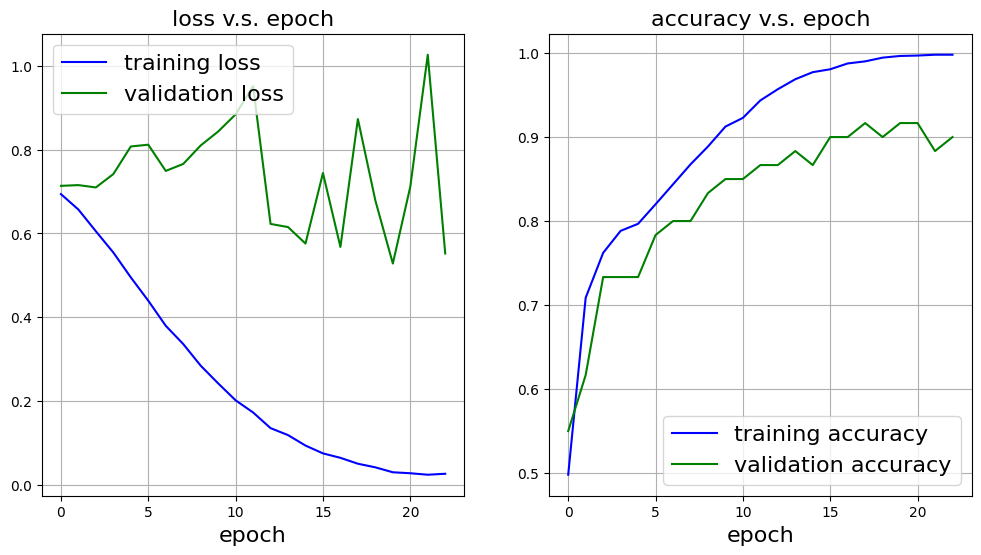

In [ ]:
plot_result(loss_train_list, acc_train_list, 
            loss_val_list, acc_val_list)

In [ ]:
best_id= np.array(acc_val_list).argmax()

In [ ]:
epoch_save=best_id
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
checkpoint=torch.load('CNN_TL_Pytorch_epoch'+str(epoch_save)+'.pt', map_location=device)
model2=Net()
model2.load_state_dict(checkpoint['model_state_dict'])
model2.to(device)
model2.eval() 
optimizer = optim.SGD(model2.get_trainable_parameters(), lr=0.0001, momentum=0.99) 
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
(loss_train_list, acc_train_list, 
 loss_val_list, acc_val_list, other_val) = checkpoint['result']  

In [ ]:
loss_test, acc_test_2, (Confusion, Acc, Sens, Prec) = test(model2, device, loader_test)
Confusion_sens=Confusion.copy()
for n in range(0, 2):
    Confusion_sens[n,:]/=np.sum(Confusion[n,:])
Confusion_prec=Confusion.copy()
for n in range(0, 2):
    Confusion_prec[:,n]/=np.sum(Confusion[:,n])
print('Accuracy (average)', acc_test_2)
print('Accuracy (average)', Acc)
print('Sensitivity', Sens)
print('Precision', Prec)
print('Confusion_sens \n', Confusion_sens)
print('Confusion_prec \n', Confusion_prec)

/var/folders/n2/tjkny83s6vv2353dkdjnr36w0000gn/T/ipykernel_5738/485592088.py:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label=torch.tensor(self.labellist[idx], dtype=torch.int64)


Accuracy (average) 0.9375
Accuracy (average) 0.9375
Sensitivity [0.955 0.92 ]
Precision [0.92270531 0.95336788]
Confusion_sens 
 [[0.955 0.045]
 [0.08  0.92 ]]
Confusion_prec 
 [[0.92270531 0.04663212]
 [0.07729469 0.95336788]]


In [ ]:
# Compare the two models training from scratch versus using transfer learning
print('2D CNN w/ transfer did better than scratch')
print(f'2D CNN (transfer) accuracy {acc_test_2} (average)')
print(f'2D CNN (scratch) accuracy {acc_test_1} (average)')

2D CNN w/ transfer did better than scratch
2D CNN (transfer) accuracy 0.9375 (average)
2D CNN (scratch) accuracy 0.9125 (average)


/var/folders/n2/tjkny83s6vv2353dkdjnr36w0000gn/T/ipykernel_5738/485592088.py:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label=torch.tensor(self.labellist[idx], dtype=torch.int64)


(224, 224, 3)


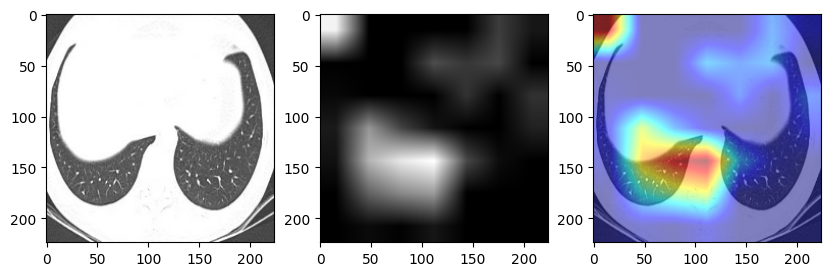

In [ ]:
# GradCam IMAGE 1
image_tensor, label = random.choice(dataset_test)

image = image_tensor.numpy().transpose(1, 2, 0)

image=image.astype("float32")
image=image/image.max()
image.shape
print(image.shape)

if len(image.shape)==2:
    image=image.reshape(224,224,1)
    image=np.concatenate([image, image, image], axis=2)
    plt.imshow(image, cmap='gray')
    
#convert numpy array to pytorch tensor
image_input=torch.tensor(image).permute(2,0,1) 
image_input=image_input.reshape(1,3,224,224)
image_input.shape
target_layers = [model2.resnet50.layer4[-1]]
cam = GradCAM(model=model2, target_layers=target_layers)
grayscale_cam = cam(input_tensor=image_input, targets=[ClassifierOutputTarget])
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

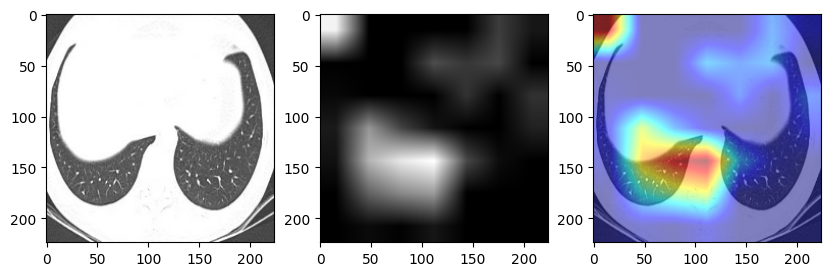

In [ ]:
#HiResCAM Image 1
cam = HiResCAM(model=model2, target_layers=target_layers)
grayscale_cam = cam(input_tensor=image_input, targets=[ClassifierOutputTarget])
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

/var/folders/n2/tjkny83s6vv2353dkdjnr36w0000gn/T/ipykernel_5738/485592088.py:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label=torch.tensor(self.labellist[idx], dtype=torch.int64)


(224, 224, 3)


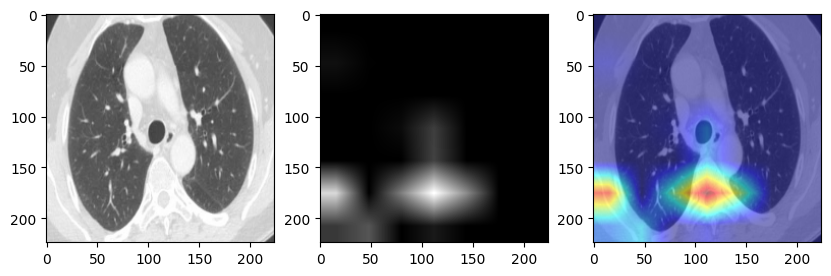

In [ ]:
# GradCam IMAGE 2
image_tensor, label = random.choice(dataset_test)


image = image_tensor.numpy().transpose(1, 2, 0)

image=image.astype("float32")
image=image/image.max()
image.shape
print(image.shape)

if len(image.shape)==2:
    image=image.reshape(224,224,1)
    image=np.concatenate([image, image, image], axis=2)
    plt.imshow(image, cmap='gray')
    
#convert numpy array to pytorch tensor
image_input=torch.tensor(image).permute(2,0,1) 
image_input=image_input.reshape(1,3,224,224)
image_input.shape
target_layers = [model2.resnet50.layer4[-1]]
cam = GradCAM(model=model2, target_layers=target_layers)
grayscale_cam = cam(input_tensor=image_input, targets=[ClassifierOutputTarget])
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

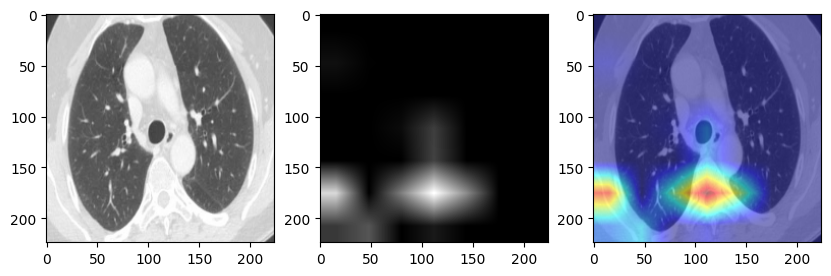

In [ ]:
#HiResCAM Image 2
cam = HiResCAM(model=model2, target_layers=target_layers)
grayscale_cam = cam(input_tensor=image_input, targets=[ClassifierOutputTarget])
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

/var/folders/n2/tjkny83s6vv2353dkdjnr36w0000gn/T/ipykernel_5738/485592088.py:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label=torch.tensor(self.labellist[idx], dtype=torch.int64)


(224, 224, 3)


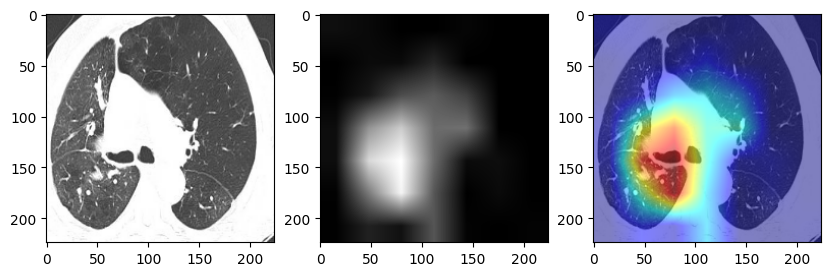

In [ ]:
# GradCam IMAGE 3
image_tensor, label = random.choice(dataset_test)


image = image_tensor.numpy().transpose(1, 2, 0) 

image=image.astype("float32")
image=image/image.max()
image.shape
print(image.shape)

if len(image.shape)==2:
    image=image.reshape(224,224,1)
    image=np.concatenate([image, image, image], axis=2)
    plt.imshow(image, cmap='gray')
    
#convert numpy array to pytorch tensor
image_input=torch.tensor(image).permute(2,0,1)
image_input=image_input.reshape(1,3,224,224)
image_input.shape
target_layers = [model2.resnet50.layer4[-1]]
cam = GradCAM(model=model2, target_layers=target_layers)
grayscale_cam = cam(input_tensor=image_input, targets=[ClassifierOutputTarget])
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)

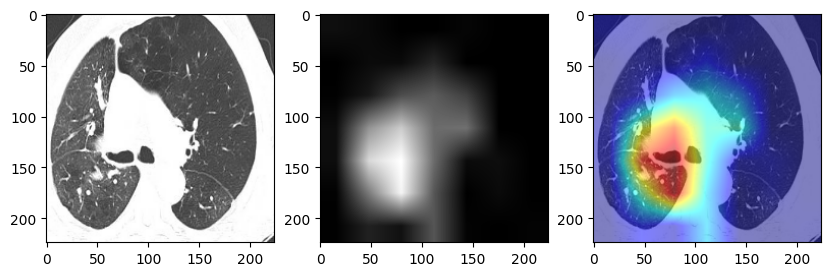

In [ ]:
#HiResCAM Image 3
cam = HiResCAM(model=model2, target_layers=target_layers)
grayscale_cam = cam(input_tensor=image_input, targets=[ClassifierOutputTarget])
grayscale_cam=grayscale_cam[0]
cam_image = show_cam_on_image(image, grayscale_cam, use_rgb=True)
fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(grayscale_cam, cmap='gray')
ax[2].imshow(cam_image)